In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("./encoded_df.csv")
df.head()

,le_gender,le_color1,le_color2,le_breed1,le_breed2,le_intake_type,le_intake_condition,le_intake_sex,le_outcome_type,le_outcome_sex,le_outcome_d_m,le_intake_d_m,Outcome_Age_Month,Duration_Day
0,1,35,33,326,106,2,5,1,5,1,5,5,80,1.113889
1,1,35,33,326,106,2,5,1,5,1,3,3,89,1.259722
2,1,33,36,124,166,1,5,1,7,1,6,6,120,4.970139
3,1,12,33,309,166,2,3,1,5,1,2,2,193,0.119444
4,0,2,33,217,120,3,0,2,5,2,2,2,185,0.870833


In [3]:

X, y = df.iloc[:,:8],df.iloc[:,8]

In [4]:
df_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/suprajasharma/anaconda3/envs/PythonData/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/suprajasharma/anaconda3/envs/PythonData/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = .3, learning_rate = .1,
                         max_depth = 5, alpha = 10, n_estimators = 10)

In [7]:
xg_reg.fit(X_train, y_train)

predictions = xg_reg.predict(X_test)

[20:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" %(rmse))

RMSE: 3.052424


In [9]:
params = {"objective": "reg:linear", "colsample_bytree": 0.3, "learning_rate": 0.1,
         "max_depth": 5, "alpha": 10}

cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3,
                   num_boost_round=50, early_stopping_rounds=10,
                   metrics="rmse", as_pandas=True, seed=123)

[20:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.872718
Name: test-rmse-mean, dtype: float64


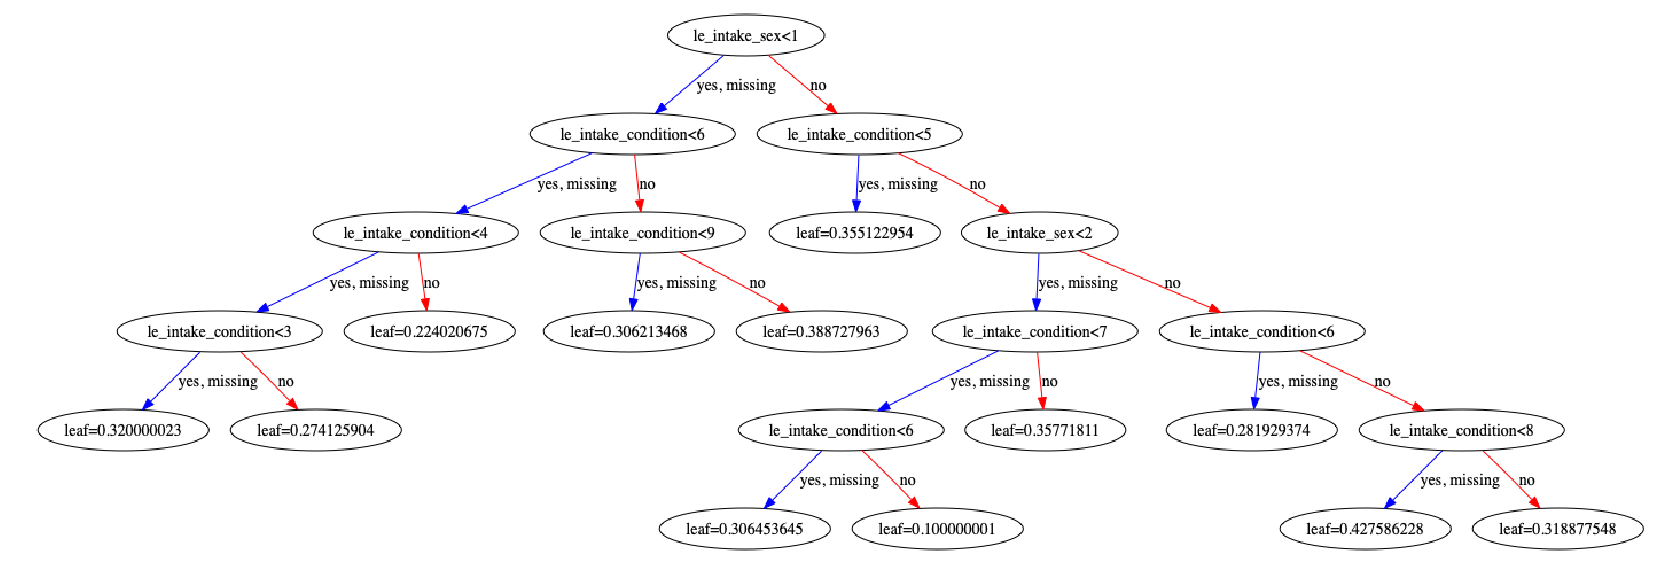

In [56]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.savefig('xgb_tree.png')

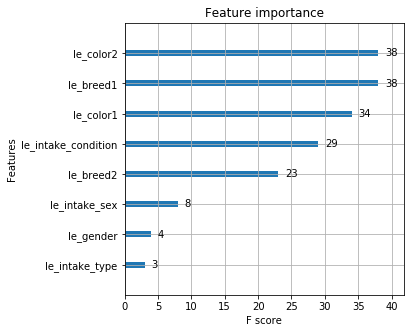

In [58]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 10})
plt.savefig('xgb_featimp.png')